of data https://www.kaggle.com/datasets/muthuj7/weather-dataset

# 데이터 로딩

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("weatherHistory.csv")

In [4]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [5]:
print(len(df))

96453


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB
None


# 살펴보기

In [7]:
non_value_columns = ["Formatted Date", "Summary", "Precip Type", "Daily Summary"]

Temperature (C)


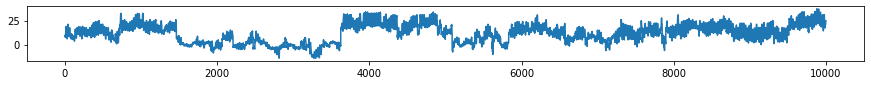

Apparent Temperature (C)


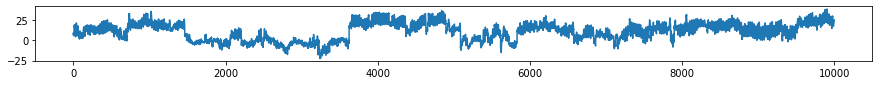

Humidity


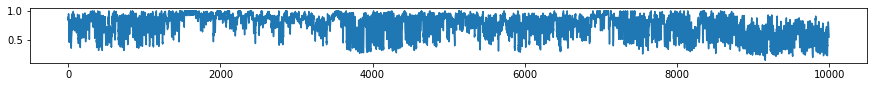

Wind Speed (km/h)


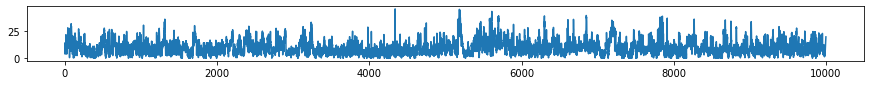

Wind Bearing (degrees)


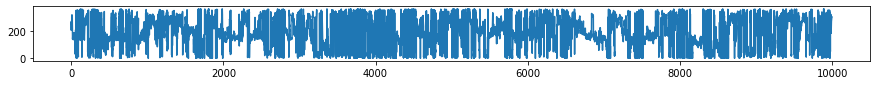

Visibility (km)


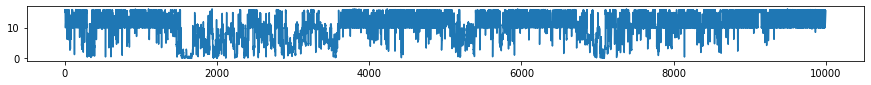

Loud Cover


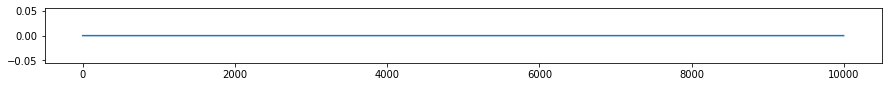

Pressure (millibars)


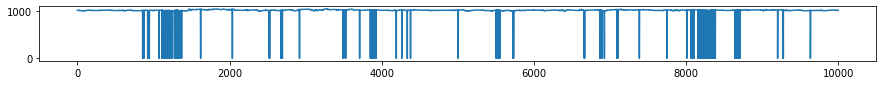

In [12]:
for column in df.columns:
    if column in non_value_columns: continue
    print(column)
    plt.figure(figsize=(15,1))
    plt.plot(df[column][:10000])
    plt.show()

Temperature (C)


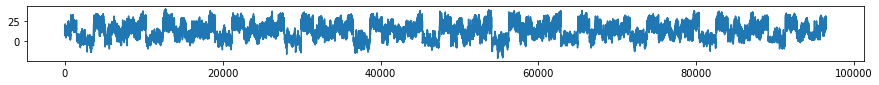

Apparent Temperature (C)


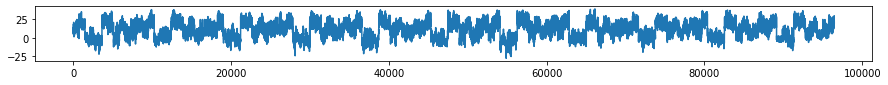

Humidity


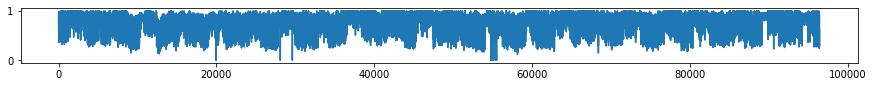

Wind Speed (km/h)


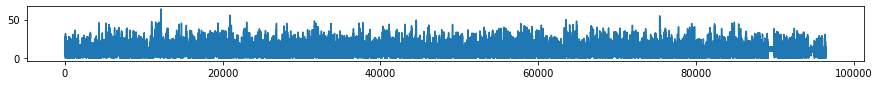

Wind Bearing (degrees)


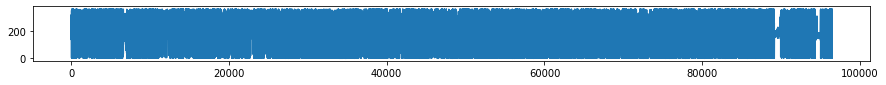

Visibility (km)


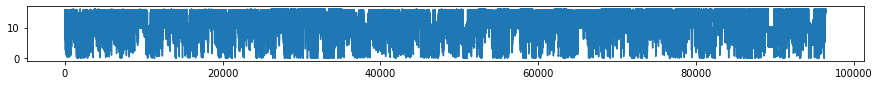

Loud Cover


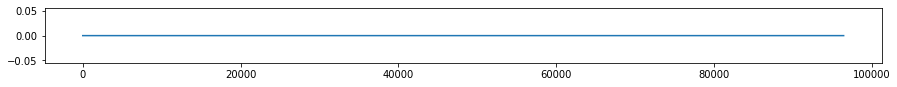

Pressure (millibars)


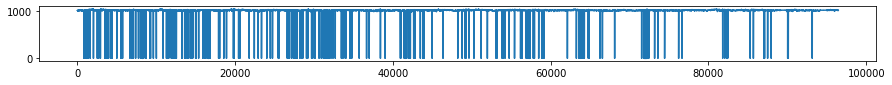

In [11]:
for column in df.columns:
    if column in non_value_columns: continue
    print(column)    
    plt.figure(figsize=(15,1))
    plt.plot(df[column])
    plt.show()

Temperature (C)


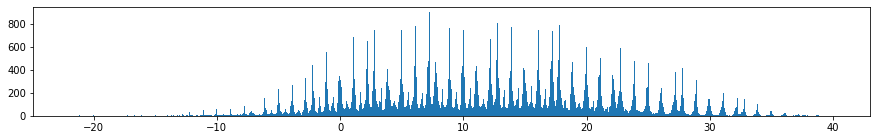

Apparent Temperature (C)


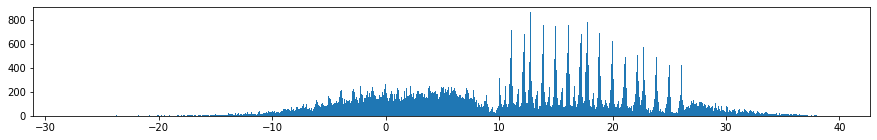

Humidity


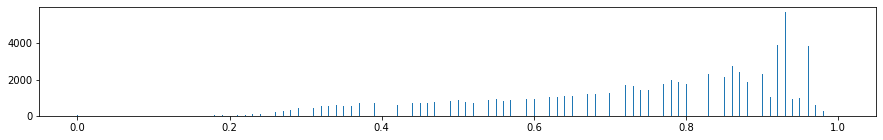

Wind Speed (km/h)


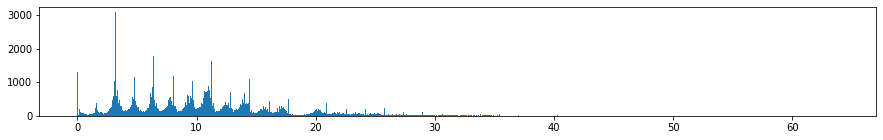

Wind Bearing (degrees)


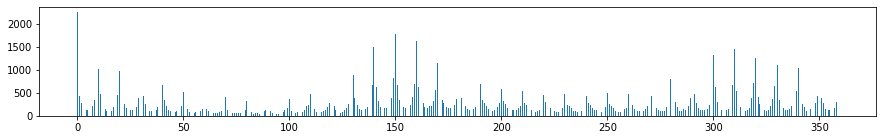

Visibility (km)


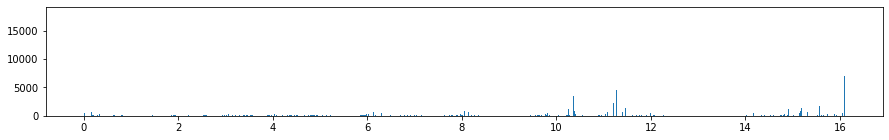

Loud Cover


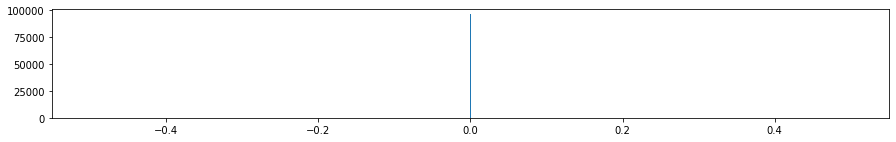

Pressure (millibars)


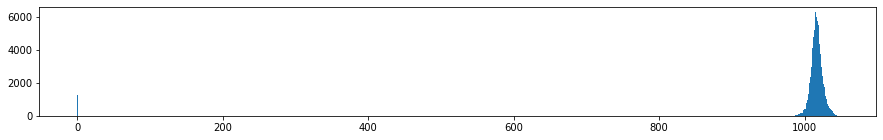

In [13]:
for column in df.columns:
    if column in non_value_columns: continue
    print(column)    
    plt.figure(figsize=(15,2))
    plt.hist(df[column], bins=1000)
    plt.show()

# 비 숫자 컬럼 삭제

In [14]:
for column_name in non_value_columns:
    df = df.drop(columns=column_name)

In [15]:
df.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51


In [16]:
df = df.drop(columns="Loud Cover")

In [17]:
df.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


# 이상치 처리

In [18]:
outlier_min = {
    "Pressure (millibars)": 980,
}

Pressure (millibars)


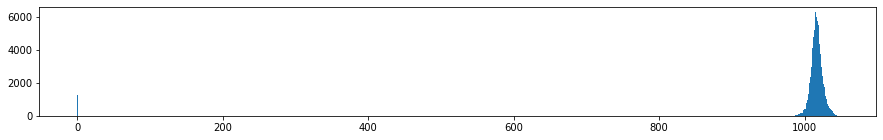

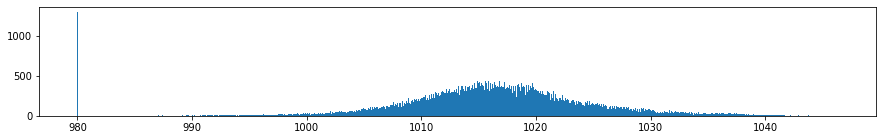

In [19]:
for column, limit in outlier_min.items():
    print(column)
    plt.figure(figsize=(15,2))
    plt.hist(df[column], bins=1000)
    plt.show()
    df.loc[df[column]<limit, column] = limit
    plt.figure(figsize=(15,2))
    plt.hist(df[column], bins=1000)
    plt.show()


In [20]:
outlier_max = {

}

In [21]:
for column, limit in outlier_max.items():
    print(column)
    plt.figure(figsize=(15,2))
    plt.hist(df[column], bins=1000)
    plt.show()
    df.loc[df[column]>limit, column] = limit
    plt.figure(figsize=(15,2))
    plt.hist(df[column], bins=1000)
    plt.show()


# Normalization

In [22]:
raw_data = df.to_numpy()

In [23]:
maxs = raw_data.max(axis=0)
print(maxs)
mins = raw_data.min(axis=0)
print(mins)

[3.99055556e+01 3.93444444e+01 1.00000000e+00 6.38526000e+01
 3.59000000e+02 1.61000000e+01 1.04638000e+03]
[-21.82222222 -27.71666667   0.           0.           0.
   0.         980.        ]


In [24]:
normalized = (raw_data - mins) / (maxs - mins)
print(normalized[:5])

[[0.50697507 0.52348604 0.89       0.2211296  0.69916435 0.983
  0.52922567]
 [0.50508505 0.52108359 0.86       0.22339889 0.72144847 0.983
  0.53675806]
 [0.50544505 0.5531439  0.89       0.06152295 0.56824513 0.929
  0.54142814]
 [0.48780488 0.50194681 0.83       0.22087746 0.74930362 0.983
  0.54850859]
 [0.49536495 0.51735565 0.83       0.17297025 0.72144847 0.983
  0.55001506]]


In [25]:
preprocessed = normalized

In [26]:
print(preprocessed.shape)

(96453, 7)


# 단일 예측

## Data Generator

In [27]:
SEQUENCE_LENGTH = 1*24*7
OFFSET = 1*24*1
BATCH_SIZE = 32

In [28]:
TARGET_FEATURE = "Temperature (C)"
TARGET_FEATURE_INDEX = df.columns.get_loc(TARGET_FEATURE)
print(TARGET_FEATURE_INDEX)

0


In [32]:
from tensorflow.keras.utils import Sequence

class DataGenerator(Sequence):

    def __init__(self, numbers, 
                 sequence_length=SEQUENCE_LENGTH, 
                 offset=OFFSET, 
                 batch_size=BATCH_SIZE, 
                 shuffle=True,
                 validation_split=0.0,
                 test_split=0.0,
                 indexes=None,
                 max_size=None):
        self.numbers = numbers
        self.sequence_length = sequence_length
        self.offset = offset
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indexes, self.valid_indexes, self.test_indexes = self._prepare_indexes(validation_split, test_split, indexes, max_size)

    def __len__(self):
        return int(np.floor(len(self.indexes) / self.batch_size))

    def __getitem__(self, index):
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        return self._generate_data(indexes)

    def on_epoch_end(self):
        self._shuffle_index()

    def _prepare_indexes(self, validation_split, test_split, indexes, max_size):
        if indexes is not None:
            return indexes, None, None

        data_count = len(self.numbers) - (self.sequence_length+self.offset) + 1
        all_index = np.arange(data_count)
        np.random.shuffle(all_index)
        if max_size is not None:
            all_index = all_index[:max_size]

        if validation_split+test_split==0.0:
            return all_index, None, None

        valid_i = int(len(all_index)*(1-validation_split-test_split))
        test_i = int(len(all_index)*(1-test_split))

        return all_index[:valid_i], all_index[valid_i:test_i], all_index[test_i:]
        
    def _shuffle_index(self):
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def _generate_data(self, indexes):
        X = np.empty((len(indexes), self.sequence_length, self.numbers.shape[-1]))
        # Y = np.empty((len(indexes), self.numbers.shape[-1]))
        Y = np.empty((len(indexes), ))

        for i, index in enumerate(indexes):
            X[i] = self.numbers[index:index+self.sequence_length]
            # Y[i] = self.numbers[index+self.sequence_length+self.offset-1]
            Y[i] = self.numbers[index+self.sequence_length+self.offset-1,TARGET_FEATURE_INDEX]
        return X, Y

    def get_all_data(self):
        return self._generate_data(self.indexes)        

    def subset(self, type):
        if type=="train":
            return DataGenerator(self.numbers, indexes=self.indexes)
        elif type=="validation" or type=="valid":
            return DataGenerator(self.numbers, indexes=self.valid_indexes)
        elif type=="test":
            return DataGenerator(self.numbers, indexes=self.test_indexes)
        else:
            print("invalid type {}".format(type))

In [33]:
data_generator = DataGenerator(preprocessed, validation_split=0.1, test_split=0.1, max_size=10000)
train_data_generator = data_generator.subset("train")
valid_data_generator = data_generator.subset("valid")
test_data_generator = data_generator.subset("test")

batch_x, batch_y = train_data_generator.__getitem__(0)
print(batch_x.shape)
print(batch_y.shape)
print(batch_x[0])
print(batch_y[0])

print(len(preprocessed)-(SEQUENCE_LENGTH+OFFSET)+1)
print(len(train_data_generator.indexes))
print(len(valid_data_generator.indexes))
print(len(test_data_generator.indexes))

(32, 168, 7)
(32,)
[[0.69057691 0.72355232 0.73       ... 0.44568245 0.966      0.4593251 ]
 [0.68652687 0.71982437 0.76       ... 0.42061281 1.         0.45962639]
 [0.68508685 0.71849888 0.77       ... 0.4178273  1.         0.45706538]
 ...
 [0.61191612 0.65114738 0.82       ... 0.38718663 0.943      0.44064477]
 [0.60147601 0.64153757 0.81       ... 0.41504178 1.         0.43687858]
 [0.58455585 0.62596305 0.84       ... 0.38718663 0.943      0.43522145]]
0.6074160741607417
96262
8000
1000
1000


## 모델 학습

In [34]:
# copy from https://gist.github.com/stared/dfb4dfaf6d9a8501cd1cc8b8cb806d2e

from IPython.display import clear_output
from tensorflow.keras.callbacks import Callback

class PlotLosses(Callback):

  def on_train_begin(self, logs={}):
    self.epochs = []
    self.losses = []
    self.val_losses = []
    self.logs = []
    self.fig = plt.figure()


  def on_epoch_end(self, epoch, logs={}):

    self.epochs.append(epoch)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))

    clear_output(wait=True)
    plt.plot(self.epochs, self.losses, label="loss")
    plt.plot(self.epochs, self.val_losses, label="val_loss")
    plt.legend()
    plt.show();
    print("loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])

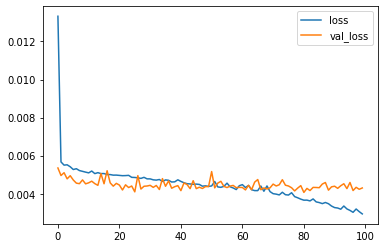

loss =  0.0029365927912294865 , val_loss =  0.004300784785300493
250/250 [==============================] - 4s 14ms/step - loss: 0.0029 - mape: 7.9502 - val_loss: 0.0043 - val_mape: 10.6188


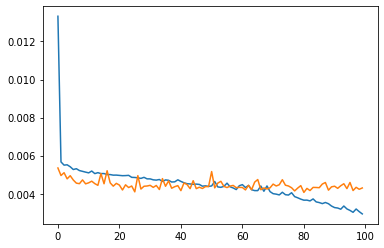

31/31 [==============================] - 0s 6ms/step - loss: 0.0041 - mape: 9.6006
loss= 0.004142619203776121
mape= 9.600576400756836


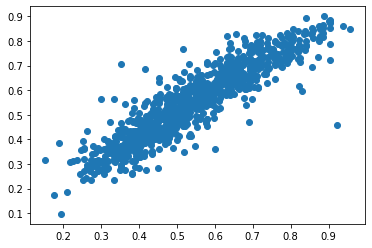

In [35]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU, Input

input_shape = (SEQUENCE_LENGTH, preprocessed.shape[-1])
# output_shape = preprocessed.shape[-1]
output_shape = 1

model = keras.Sequential()
model.add(Input(input_shape))
model.add(LSTM(128))
model.add(Flatten())
model.add(Dense(10, activation="relu"))
model.add(Dense(output_shape))
model.compile(loss="mse", optimizer="adam", metrics=["mape"])
model.summary()

plot_losses = PlotLosses()
history = model.fit(train_data_generator, epochs=100, verbose=1, validation_data=valid_data_generator,
                    callbacks=[plot_losses])


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mape = model.evaluate(test_data_generator)
print("loss=", loss)
print("mape=", mape)


batch_x, batch_y = test_data_generator.get_all_data()
y_ = model.predict(batch_x).squeeze()
# for i in range(output_shape):
#     plt.scatter(batch_y[:,i], y_[:,i])
#     plt.show()
plt.scatter(batch_y, y_)
plt.show()    

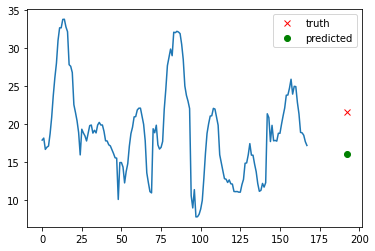

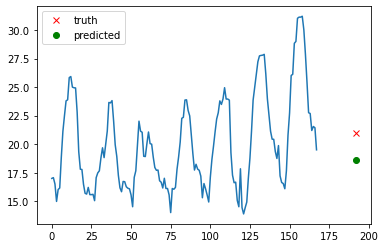

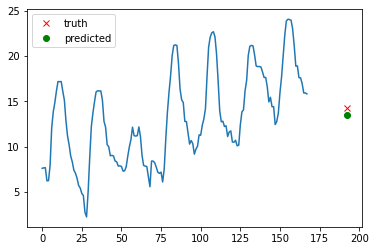

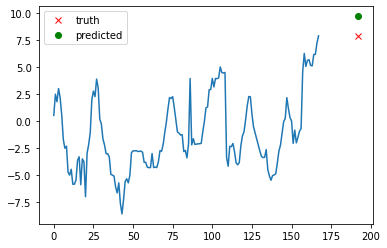

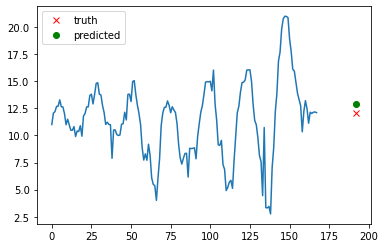

In [36]:
I = TARGET_FEATURE_INDEX
features = batch_x * (maxs[I] - mins[I]) + mins[I]
truth = batch_y * (maxs[I] - mins[I]) + mins[I]
predicted = y_ * (maxs[I] - mins[I]) + mins[I]

for i in range(5):
  plt.plot(features[i,:,I])
  plt.plot([SEQUENCE_LENGTH+OFFSET], truth[i], 'rx', label="truth")
  plt.plot([SEQUENCE_LENGTH+OFFSET], predicted[i], 'go', label="predicted")
  plt.legend()
  plt.show()

